# **PART 1**

In [50]:
from turtledemo.penrose import start

import pandas as pd
import matplotlib.pyplot as plt

data_path = "housing.csv"
data = pd.read_csv(data_path)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


First we are checking if there are any correlation with features and targets(median house value)

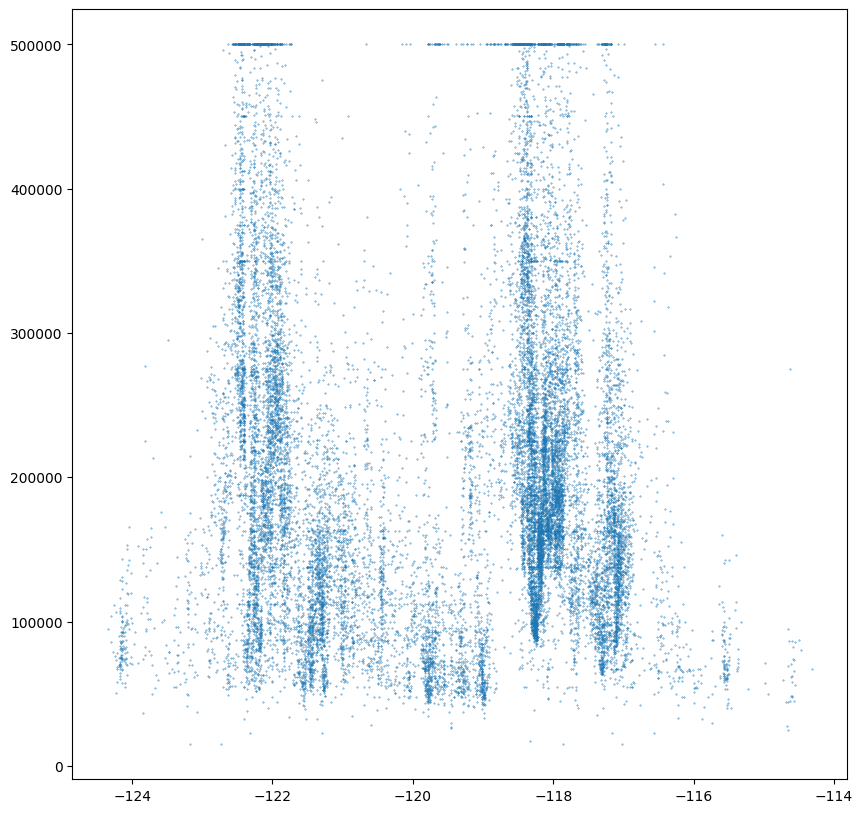

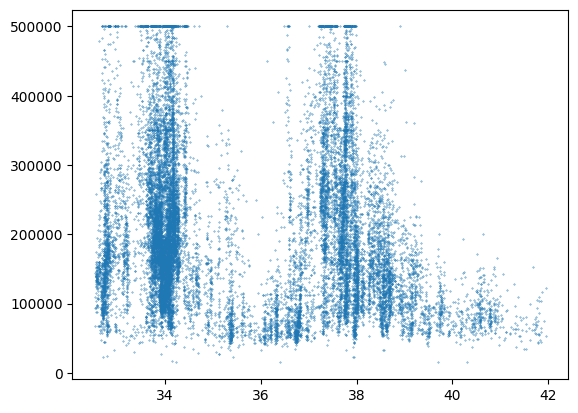

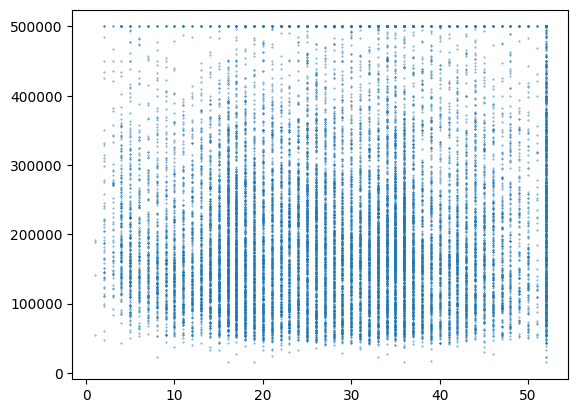

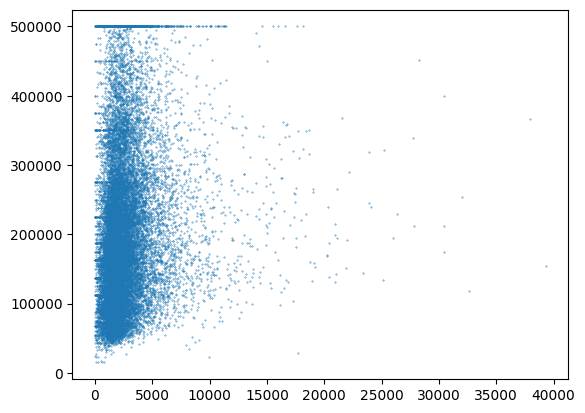

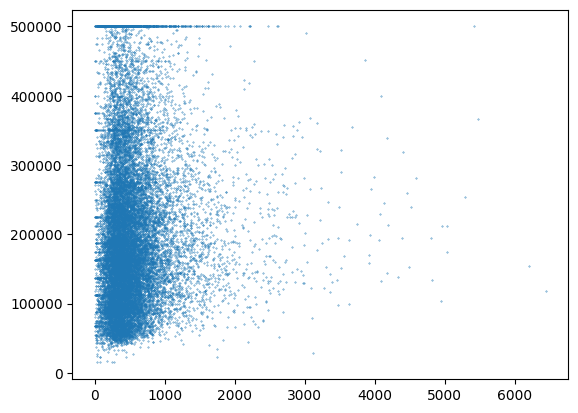

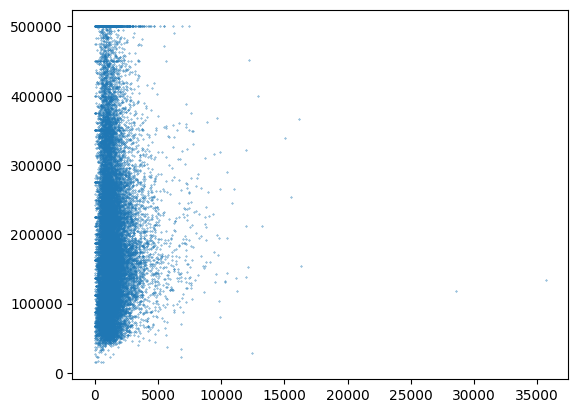

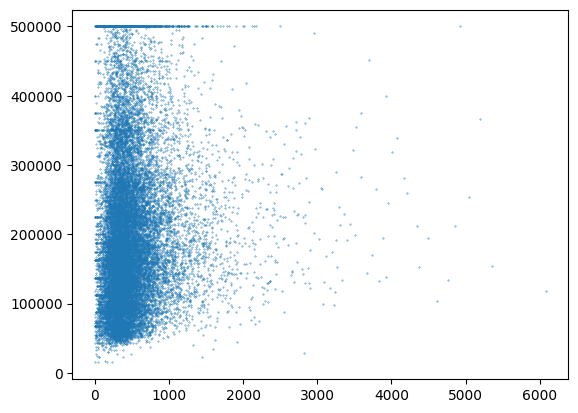

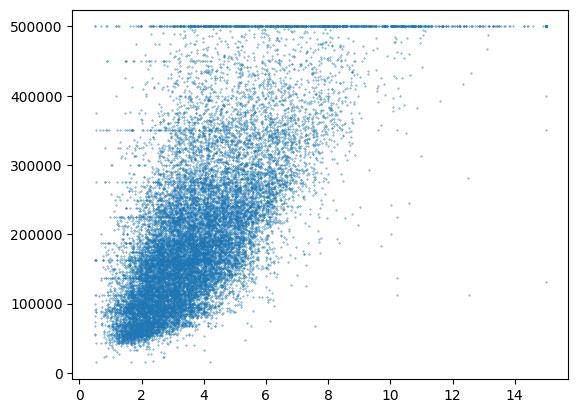

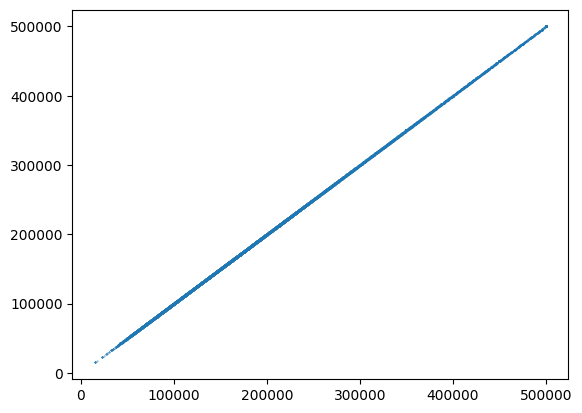

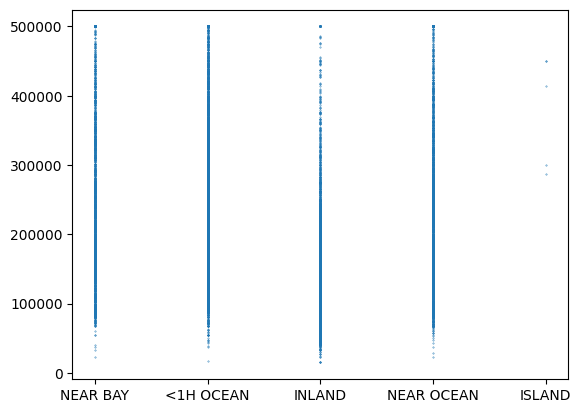

<Figure size 640x480 with 0 Axes>

In [51]:
fig = plt.figure(figsize=(10,10))
for i in data.columns:
    plt.scatter(data[i],data["median_house_value"],s=0.1)
    plt.show()
    plt.title(i)
    plt.clf()

from the following graphs we can see there is only one graph with reasonable correlation that is the plot of household income vs house value. this can also be verified using a correlation heat map.
In the next cell since there are only around one percent cell in our data with null value we can remove it or the column with null value is the total number of bedroom, but it seems to have an almost perfect correlation therefore the data missing can be replaced by household number but this wouldn't make a difference since we won't be considering total_bedrooms for training model

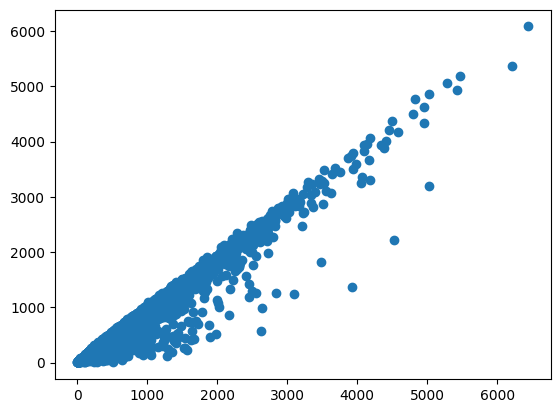

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,45.26,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,35.85,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,35.21,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,34.13,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,34.22,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,7.81,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,7.71,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,9.23,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,8.47,INLAND


In [52]:
plt.scatter(data['total_bedrooms'],data['households'])
plt.show()
data.loc[data['total_bedrooms'].isnull(),'total_bedrooms'] = data['households']
data.median_house_value = data.median_house_value/10000
data

## This is the core of our Model

We are using a linear regression model and calaulating the best bais and weight which gives minimum for cost function( mean square erroe) with the help of gradient decent.
In this method we start of with random values for weights and bais for this we have used numpy
then we find the partial derivative of the cost function with respect to different weights and bais and is stored in the variable derivative.
The derivative eof cost function is as follow

$$C(x) =  \frac{1}{n} \Sigma ( y_{i} - y) ^{2}$$

On diffrenctiating $$C(x)$$ we get
$$\frac{\partial C(x)}{\partial  w_{i} } = -2 \frac{1}{n} \Sigma ( y_{i} - y) x_{i} $$

where $$ y $$ is the predicted value

We then plug in the values and find the mean square error derivative with respect to different weights and bais

then we calculate the new weights by using the formula

$$W_{i}=W_{i} + \frac{\partial C(x)}{\partial  w_{i}}*learning step$$

convergence time is  46.844767332077026


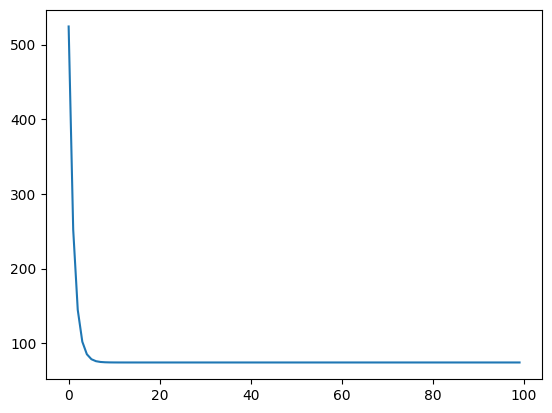

In [53]:
import numpy as np #numpy is only used to represent the data it does not used any operation from external library
import time
from sklearn.model_selection import train_test_split #to split data
import math
import statistics
class LinearRegressionModel:
    def __init__(self, df, df1,ls):
        self.df = df
        self.Weights = []
        self.Bias = 0
        self.derivative = []
        self.output = df1
        self.learning_steps = ls
        self.setWeights()

    def setWeights(self):
        self.Weights = [0.2]
        self.derivative = [0.0] * len(self.Weights)

    def predict(self, x):
        result = self.Bias
        for i in range(len(x)):
            result += self.Weights[i] * x.iloc[i]
        return result

    def gradient(self):
        learning_rate = 0.01
        start = time.time()
        it = []
        earr = []
        for p in range(self.learning_steps):
            it.append(p)
            total_error = 0

            for j in range(len(self.Weights)):
                der = 0
                bias_der = 0
                err = 0
                for i in range(len(self.df)):
                    err = self.output.iloc[i] - self.predict(self.df.iloc[i])
                    der += -2 * self.df.iloc[i,j] * (err)
                    total_error+=err**2/(len(self.df))
                bias_der += -2 * (err)
                self.derivative[j] = der / len(self.df)
                self.Bias -= learning_rate * (bias_der / len(self.df))
            earr.append(total_error)

            self.Weights = [w - learning_rate * d for w, d in zip(self.Weights, self.derivative)]
        plt.plot(it, earr)
        end = time.time()
        print("convergence time is ", end - start)

data = data[["median_income","median_house_value"]]

# this was a function i used to scale the data but did not seem to help much
# for column in data.columns:
#         col_data = data[column]
#         mean = sum(col_data) / len(col_data)
#         variance = sum((x - mean) ** 2 for x in col_data) / len(col_data)
#         std_dev = variance ** 0.5
#         data[column] = [(x - mean) / std_dev for x in col_data]
training_data,test_data = train_test_split(data,test_size=0.4)


lin = LinearRegressionModel(training_data.drop("median_house_value",axis=1),training_data.median_house_value,100)
lin.gradient()
err2 = 0
err = 0
sumofsquares = 0
mean = statistics.mean(data.median_house_value)
for k in range(len(test_data)):
    e = abs(data.iloc[k]["median_house_value"] - lin.predict(data.iloc[k].drop("median_house_value")))
    err += abs(e)
    err2 += e**2
    sumofsquares += (data.iloc[k]["median_house_value"] - mean)**2

Li_rmse = math.sqrt(err2 / len(data))
Li_mae = err / len(data)
Li_r2 = 1-(err2/sumofsquares)



The above is the plot of cost function with respect to number of iteration from this it is clear after around 10 steps it won't make a difference in cost function

## note!
this function also works with multiple features just change the input

In [54]:
print("mean absolute error",Li_mae)
print("root mean square",Li_rmse)
print("R2 score",Li_r2)

mean absolute error 2.3350834798524214
root mean square 5.168268868849645
R2 score 0.44619609008695527


[np.float64(5.1243892436636544)]


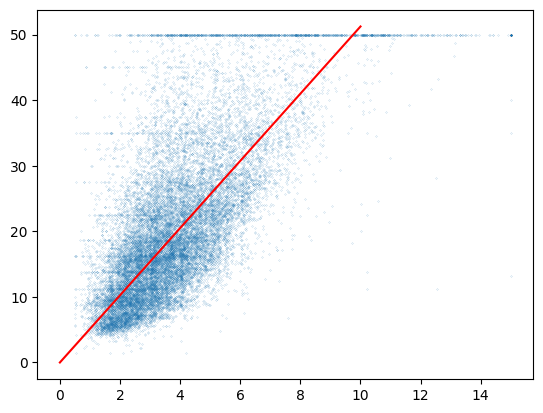

In [55]:
print(lin.Weights)
plt.scatter(data["median_income"],data["median_house_value"],s = 0.01)
x = np.linspace(0, 10, 400)
# Calculate corresponding y values using the equation y = weight * x + bias
y = lin.Weights * x + lin.Bias

# Plot the line
plt.plot(x, y,'r')
plt.show()

The red line represent the predicted value of our model

# PART 2

using numpy

convergence time is  0.07713818550109863
mean absolute error [2.30059993]
root mean square 5.037639819157668
R2 score [0.47383731]


C:\Users\SEBASTIAN\AppData\Local\Temp\ipykernel_11916\2262283279.py:52: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Linp_rmse = math.sqrt(err2 / len(data))


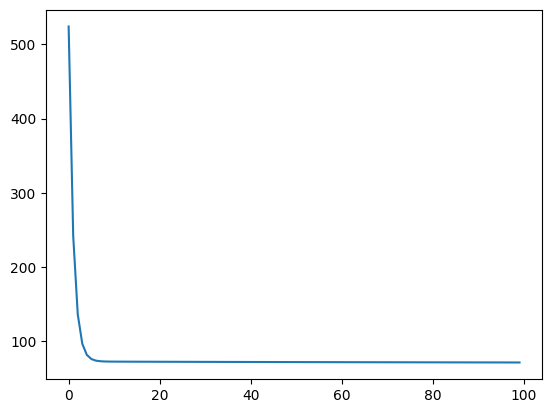

In [59]:
class LinearRegressionModelNP:
    def __init__(self, df, df1,ls):
        self.df = df
        self.df.reset_index(drop=True, inplace=True)
        self.Weights = [[0.2]*len(self.df.columns)]
        self.Bias = 0
        self.derivative = np.zeros(len(df))
        self.output = df1
        self.output.reset_index(drop=True, inplace=True)
        self.learning_steps = ls
        self.mse = 0


    def predict(self, x):
        result = np.dot(x,self.Weights) + self.Bias
        return result.flatten()

    def gradient(self):
        learning_rate = 0.01
        start = time.time()
        it = []
        earr = []
        for p in range(self.learning_steps):
            it.append(p)
            total_error = 0
            der = 0
            bias_der = 0
            err = (self.output - self.predict(self.df))
            self.derivative = -2*np.dot(self.df.T,err)
            bias_der += np.sum(-2 *err)
            self.derivative = self.derivative / len(self.df)
            self.Bias -= learning_rate * (bias_der / len(self.df))
            earr.append(np.sum(np.square(err))/len(self.df))

            self.Weights = [w - learning_rate * d for w, d in zip(self.Weights, self.derivative)]
        plt.plot(it, earr)
        self.mse = earr[-1]
        end = time.time()
        print("convergence time is ", end - start)
linNP = LinearRegressionModelNP(training_data.drop("median_house_value",axis=1),training_data.median_house_value,100)
linNP.gradient()
err2 = 0
err = 0
sumofsquares = 0
mean = statistics.mean(data.median_house_value)
for k in range(len(test_data)):
    e = abs(data.iloc[k]["median_house_value"] - linNP.predict(data.iloc[k].drop("median_house_value")))
    err += abs(e)
    err2 += e**2
    sumofsquares += (data.iloc[k]["median_house_value"] - mean)**2

Linp_rmse = math.sqrt(err2 / len(data))
Linp_mae = err / len(data)
Linp_r2 = 1-(err2/sumofsquares)

print("mean absolute error",Linp_mae)
print("root mean square",Linp_rmse)
print("R2 score",Linp_r2)


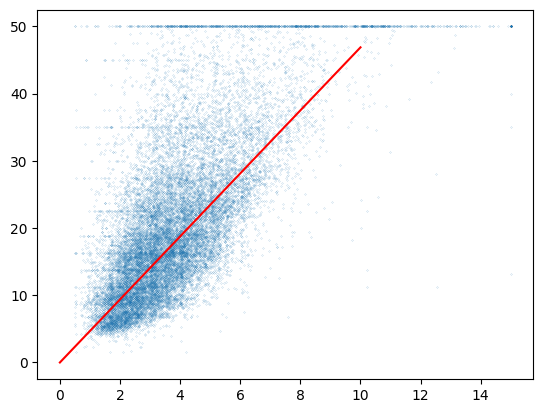

In [57]:
plt.scatter(data["median_income"],data["median_house_value"],s = 0.01)
x = np.linspace(0, 10, 400)
# Calculate corresponding y values using the equation y = weight * x + bias
y = linNP.Weights[0] * x + lin.Bias

# Plot the line
plt.plot(x, y,'r')
plt.show()

# PART 3

### using Scikit-learn

 time is  0.004490852355957031
mean absolute error 6.269903600746644
root mean square 8.373436837165718
R2 score 0.4734375076803622


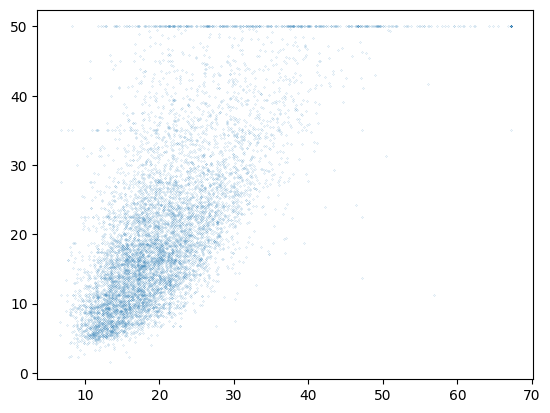

In [60]:
import sklearn as sk
from sklearn.linear_model import LinearRegression as LinearRegression

model  = LinearRegression()
start = time.time()
model.fit(training_data.drop("median_house_value",axis=1),training_data.median_house_value)
end = time.time()
sk_fittime = end - start
pred = model.predict(test_data.drop("median_house_value",axis=1))
plt.scatter(pred,test_data["median_house_value"],s = 0.01)

sk_mse = sk.metrics.mean_absolute_error(data["median_house_value"],model.predict(data.drop("median_house_value",axis=1)))
sk_rmse = sk.metrics.root_mean_squared_error(data["median_house_value"],model.predict(data.drop("median_house_value",axis=1)))
sk_r2 = sk.metrics.r2_score(data["median_house_value"],model.predict(data.drop("median_house_value",axis=1)))

print(" time is ", sk_fittime)
print("mean absolute error",sk_mse)
print("root mean square",sk_rmse)
print("R2 score",sk_r2)
